<a href="https://colab.research.google.com/github/jpaguilarc99/Python-codes/blob/main/Drop_columns_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd 
import numpy as np

#IMPORTAMOS EL DATASET
df = pd.read_csv("db_train_ton_ha.csv", sep=",")
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%Y-%m-%d")

#PREPARAMOS EL DATASET
first_column = df.pop("AÑO")
second_column = df.pop("MES")
df.insert(0, "MES", second_column)
df.insert(0, "AÑO", first_column)
df = df.set_index(["Fecha"])

#AGREGAMOS RUIDO AL DATASET
noise = np.random.normal(0, 700, len(df["ton/ha_prox12"]))
df["noise"] = noise

In [ ]:
nombres_variables_meteorologicas = ["ALLSKY_SFC_PAR_TOT",	"T2M",	"TS","ALLSKY_SFC_LW_DWN",
                                    "QV2M",	"RH2M",	"PRECTOTCORR", "WS2M",
                                    "GWETPROF","GWETTOP"]

def dataframe_dropeado(df, nombres_variables):
  estadisticas = pd.DataFrame(df["AÑO"])
  estadisticas["MES"] = df["MES"]
  estadisticas["Municipio"] = df["Municipio"]
  estadisticas["Area Sembrada (ha)"] = df["Area Sembrada (ha)"]
  noise = np.random.normal(0, 700, len(df["ton/ha_prox12"]))
  estadisticas["noise"] = noise

  for var in nombres_variables:
    estadisticas[f"{var}"] = df[f"{var}"]

  for dato in nombres_variables:
    estadisticas[f"avg_{dato}_ult_12"] = df[f"avg_{dato}_ult_12"]
    estadisticas[f"std_{dato}_ult_12"] = df[f"std_{dato}_ult_12"]
    estadisticas[f"median_{dato}_ult_12"] = df[f"median_{dato}_ult_12"]
    estadisticas[f"max_{dato}_ult_12"] = df[f"max_{dato}_ult_12"]
    estadisticas[f"min_{dato}_ult_12"] = df[f"min_{dato}_ult_12"]
      
    estadisticas[f"avg_{dato}_ult_9"] = df[f"avg_{dato}_ult_9"]
    estadisticas[f"std_{dato}_ult_9"] = df[f"std_{dato}_ult_9"]
    estadisticas[f"median_{dato}_ult_9"] = df[f"median_{dato}_ult_9"]
    estadisticas[f"max_{dato}_ult_9"] = df[f"max_{dato}_ult_9"]
    estadisticas[f"min_{dato}_ult_9"] = df[f"min_{dato}_ult_9"]
      
    estadisticas[f"avg_{dato}_ult_6"] = df[f"avg_{dato}_ult_6"]
    estadisticas[f"std_{dato}_ult_6"] = df[f"std_{dato}_ult_6"]
    estadisticas[f"median_{dato}_ult_6"] = df[f"median_{dato}_ult_6"]
    estadisticas[f"max_{dato}_ult_6"] = df[f"max_{dato}_ult_6"]
    estadisticas[f"min_{dato}_ult_6"] = df[f"min_{dato}_ult_6"]
      
    estadisticas[f"avg_{dato}_ult_3"] = df[f"avg_{dato}_ult_3"]
    estadisticas[f"std_{dato}_ult_3"] = df[f"std_{dato}_ult_3"]
    estadisticas[f"median_{dato}_ult_3"] = df[f"median_{dato}_ult_3"]
    estadisticas[f"max_{dato}_ult_3"] = df[f"max_{dato}_ult_3"]
    estadisticas[f"min_{dato}_ult_3"] = df[f"min_{dato}_ult_3"]

  estadisticas["productividad"] = df["Productividad"]
  estadisticas["product_prox12"] = df["product_prox12"]
  estadisticas["ton/ha"] = df["productividad/ha"]
  estadisticas["ton/ha_prox12"] = df["ton/ha_prox12"]

  return estadisticas

db_rf = dataframe_dropeado(df, nombres_variables_meteorologicas)

In [ ]:
db_rf

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics

#df -> dataframe completo (productividad + metereologicas)
y = df["ton/ha_prox12"]

#-> convertir todas las variables categoricas a númericas (municipio, codigo, region, mes, año), ejemplo:
#le = preprocessing.LabelEncoder()
#le.fit(df['Municipio'].astype(str))
#db_rf['Municipio'] = le.transform(db_rf['Municipio'].astype(str))

#eliminamos variable y (objetivo) y fecha
X = df.drop(['ton/ha_prox12','product_prox12','Productividad',
              'Area Sembrada (ha)','Municipio'], axis=1)

np.random.seed(seed = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state = 42)

from sklearn.ensemble import RandomForestRegressor

feature_names = [f"{X.columns[i]}" for i in range(X.shape[1])]
rf = RandomForestRegressor(random_state=0,
                           oob_score = True,
                           bootstrap = True)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_valid)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_valid, y_valid)))

R^2 Training Score: 0.85 
OOB Score: -0.22 
R^2 Validation Score: -6.29


In [56]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time


forest_importances = pd.DataFrame(importances, index=feature_names)

In [57]:
forest_importances

,0
AÑO,0.010305
MES,0.000014
TOA_SW_DWN,0.000022
ALLSKY_SFC_PAR_TOT,0.247314
T2M,0.004916
...,...
median_GWETTOP_ult_3,0.000005
max_GWETTOP_ult_3,0.008562
min_GWETTOP_ult_3,0.000001
productividad/ha,0.068670


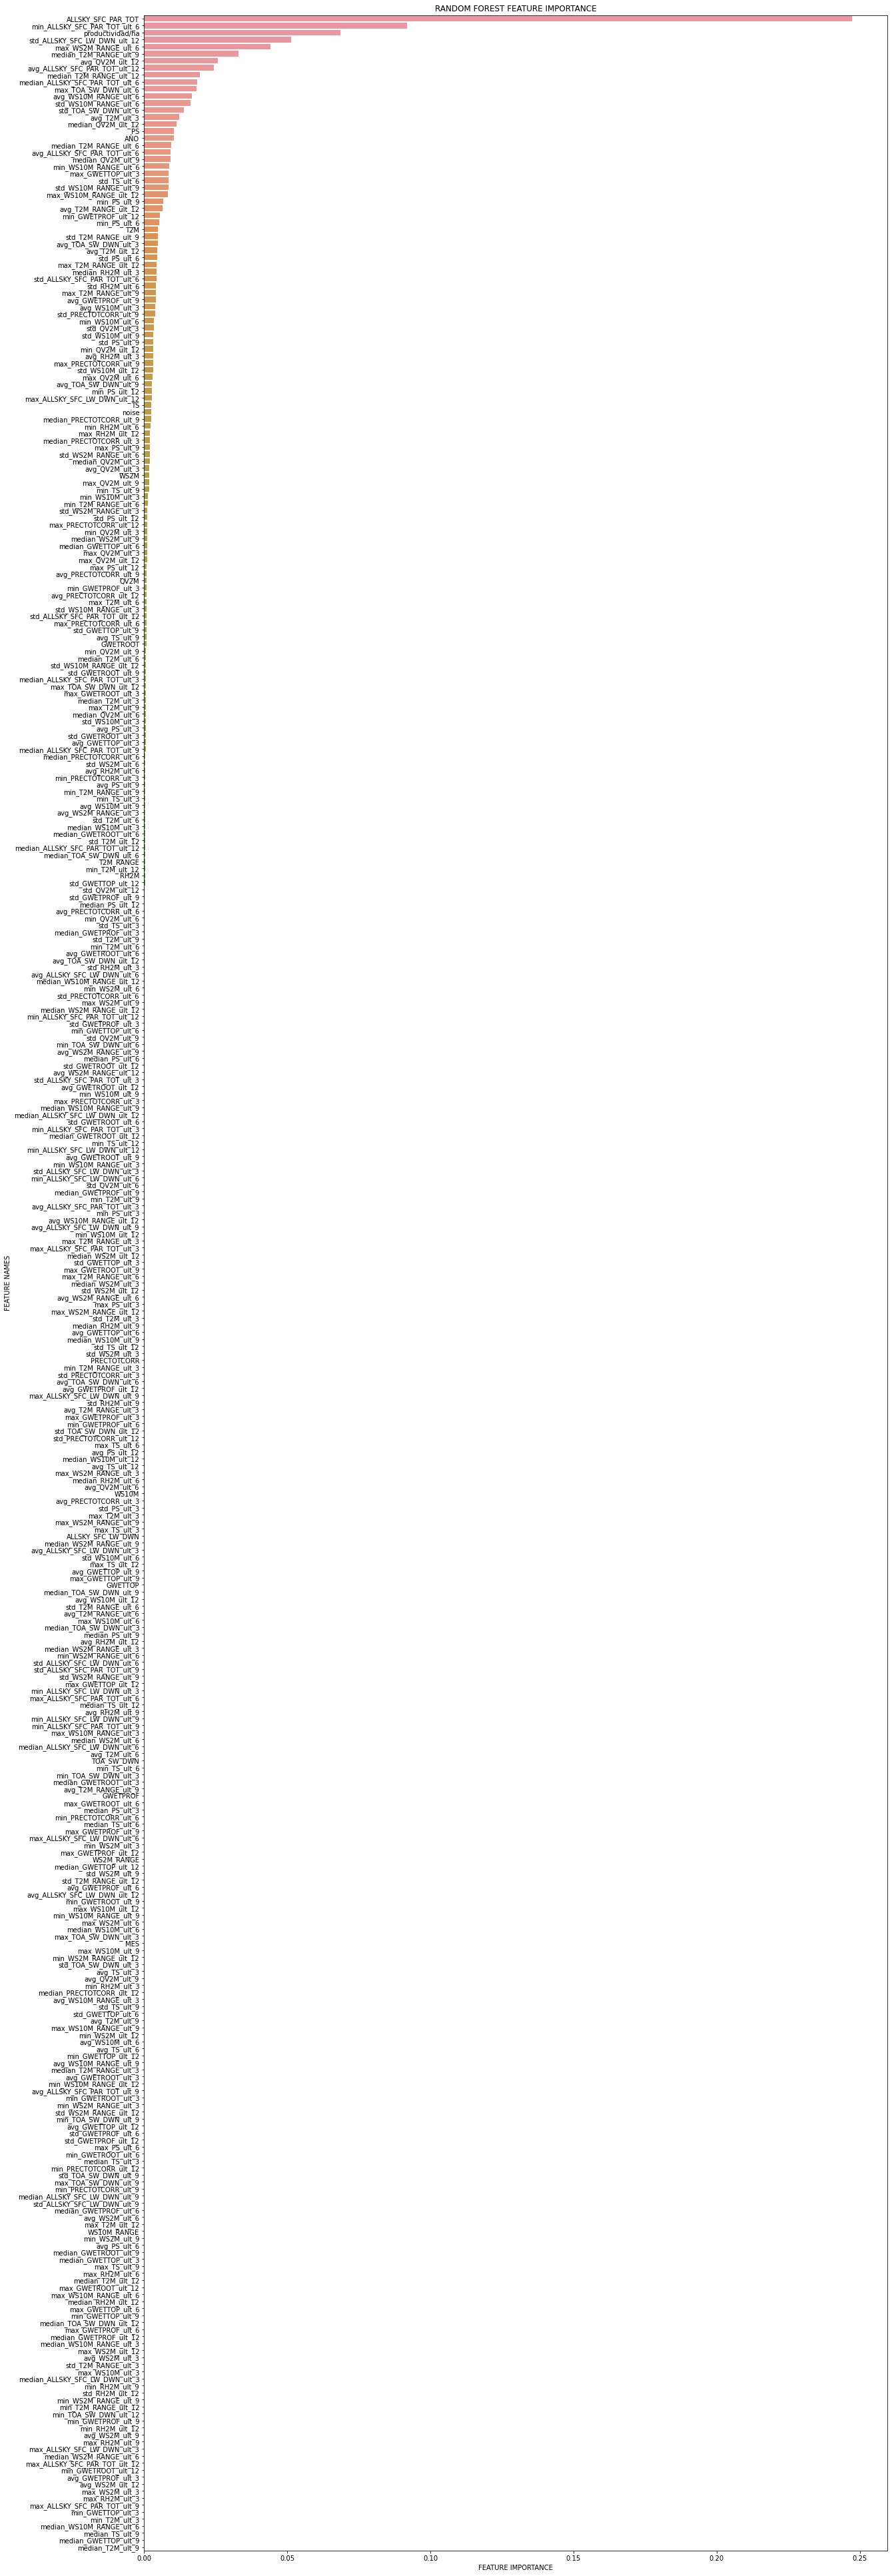

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(20,70))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(rf.feature_importances_, X.columns,'RANDOM FOREST')
plt.savefig("Importances_proove.png")